Design and develop a LSTM model for stock price prediction. Predict the opening price for Google Stock for next 15 days.


### Step 1: Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

### Step 2: Data Preparation and Scaling

In [ ]:
import pandas as pd

# Specify the engine as openpyxl explicitly
data = pd.read_csv('Google_Stock_Price_Train.csv')

# Display the first few rows to verify the data
print(data.head())

         Date    Open    High     Low   Close       Volume
0  01/03/2012  325.25  332.83  324.97  663.59    73,80,500
1  01/04/2012  331.27  333.87  329.08  666.45    57,49,400
2  01/05/2012  329.83  330.75  326.89  657.21    65,90,300
3  01/06/2012  328.34  328.77  323.68  648.24    54,05,900
4  01/09/2012  322.04  322.29  309.46  620.76  1,16,88,800


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Read the CSV file
data = pd.read_csv('Google_Stock_Price_Train.csv', parse_dates=['Date'], dayfirst=True)

# Ensure Date is set as the index
data.set_index('Date', inplace=True)

# Convert 'Open' column to float and reshape
production = data['Open'].astype(float).values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(production)

### Step 3: Creating Sequences and Train-Test Split

Here, we generate sequences of input data and split the dataset into training and testing sets.
We use a sliding window of 12 months (1 year) of past data to predict the next month’s production.
The dataset is split into training and testing sets, and reshaped to match the LSTM input shape.

In [ ]:
window_size = 15
X = []
y = []
target_dates = data.index[window_size:]

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0]) #X stores the past 12 months of scaled_data (features).
    y.append(scaled_data[i, 0]) #y stores the next month's production value (target).

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, target_dates, test_size=0.25, shuffle=False
)
#Reshapes data into 3D format:(samples, time steps, features) → (batch size, 12, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


### Step 4: Building the LSTM Model

This step involves defining and building the LSTM model architecture.

The model consists of two LSTM layers, each with 128 units, and a dropout layer after each to prevent overfitting.
The model concludes with a Dense layer to predict a single value (next month’s production).

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\cse\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 5: Training and Evaluating the Model

In this step, we train the model on the training data and evaluate its performance.

The model is trained for 100 epochs using a batch size of 32, with 10% of the training data used for validation.
After training, the model is used to make predictions on the test set, and we calculate the Root Mean Squared Error (RMSE) to evaluate performance.

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

rmse = np.sqrt(np.mean((y_test - predictions)**2))
print(f'RMSE: {rmse:.2f}')


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0303 - val_loss: 9.9924e-04
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8566e-04 - val_loss: 8.7630e-04
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3253e-04 - val_loss: 9.3769e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0710e-04 - val_loss: 0.0010
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5867e-04 - val_loss: 8.8349e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5850e-04 - val_loss: 0.0010
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1205e-04 - val_loss: 9.3383e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1973e-04 - val_loss: 9.0975e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2080e-04 - val_loss: 0.0011
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8773e-04 - val_loss: 0.0011
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8892e-04 - val_loss: 8.388

### Visualizing Model Performance

In this step, we visualize the actual vs predicted values. A plot is generated to compare the actual milk production against the predicted values, allowing us to evaluate how well the model performs over time.

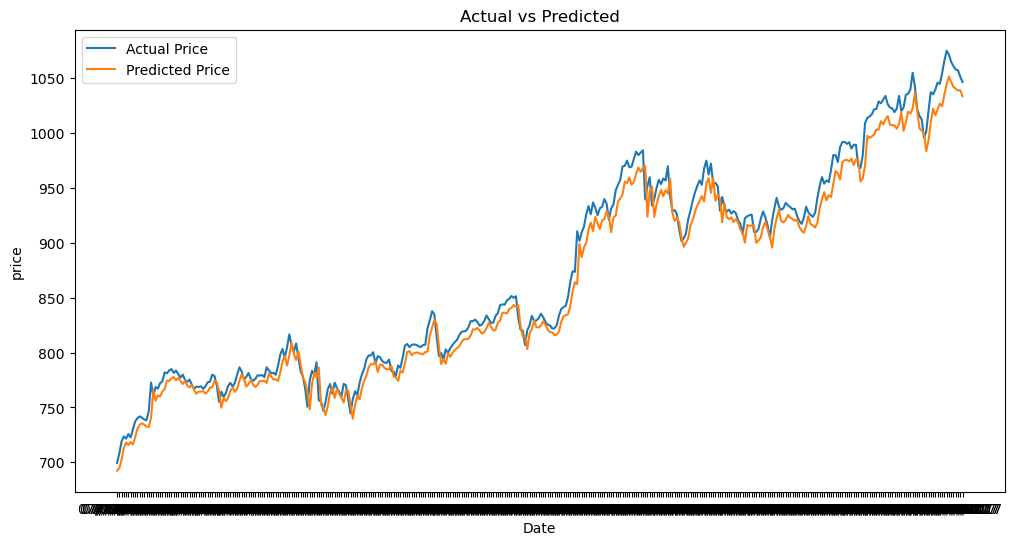

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test, label='Actual Price')
plt.plot(dates_test, predictions, label='Predicted Price')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()


### Using L2 regularizer

In [ ]:
from tensorflow.keras.regularizers import l2

# Define L2 regularization factor
l2_lambda = 0.01  # Adjust as needed

# Build the model
modelL2 = Sequential()
modelL2.add(LSTM(128, return_sequences=True, input_shape=(100, 1),
               kernel_regularizer=l2(l2_lambda)))

modelL2.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(l2_lambda)))

modelL2.add(LSTM(128, kernel_regularizer=l2(l2_lambda)))

modelL2.add(Dense(1, kernel_regularizer=l2(l2_lambda)))

# Compile the model
modelL2.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Summary of the model
modelL2.summary()

C:\Users\cse\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329,857 (1.26 MB)

 Trainable params: 329,857 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = modelL2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

rmse = np.sqrt(np.mean((y_test - predictions)**2))
print(f'RMSE: {rmse:.2f}')

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 3.3126 - val_loss: 1.3803
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0504 - val_loss: 0.3770
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2783 - val_loss: 0.0915
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0668 - val_loss: 0.0270
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186 - val_loss: 0.0117
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0086 - val_loss: 0.0059
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0071 - val_loss: 0.0097
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - val_loss: 0.0064
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

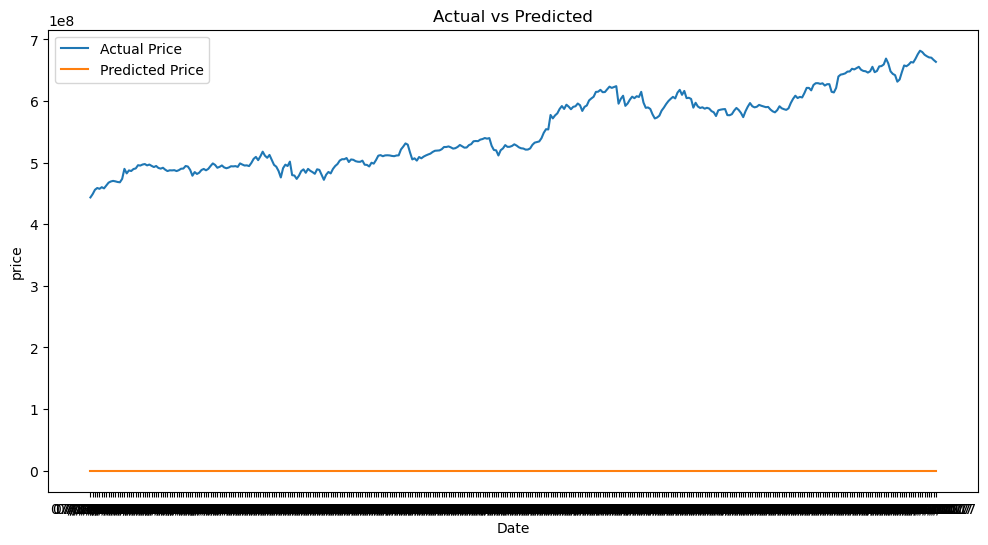

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dates_test, y_test, label='Actual Price')
plt.plot(dates_test, predictions, label='Predicted Price')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()
